In [1]:
%reset -f
# libraires librosa jouer avec des audios
import librosa
import librosa.display

# libraires jouer des audios
import soundfile as sf
import sounddevice as sd

# libraires jouer des audios mais avec le bouton - plus jolie
from IPython.display import Audio

# libraires classiques
import numpy as np
import matplotlib.pyplot as plt

# libraires PIL jouer avec des images
import PIL
from PIL import Image
import cv2

# For plotting headlessly
import scipy
import scipy.signal
import scipy.io.wavfile

import os

C:\Users\ngotr\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# 1. Des fontions utiles

In [2]:
def audio2spectrogram(audio_file, n_mels = 128, path = None):
    #audio2spectrogram
    #audio_file:
    #n_mels:
    #path:
    
    # Lire audio
    y, sr= librosa.load(path + audio_file)
    
    # Scaling mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels*2)
    # Transformation log
    S_db_mel = librosa.power_to_db(S, ref=np.max)
    
    # Convert en np.array
    S_array = np.array(S_db_mel).astype(np.float32)
    # Convert en Image
    S_im = Image.fromarray(S_array, mode ='F')
    # Enregistrement
    S_im.save(audio_file[:-4]+'.tiff')

def spectrogram2audio(spectrogram, sr = 22050,volume = 1.2, path = None):
    if path == None:
        # Lire spectrogram
        im = Image.open(spectrogram)
    else:
        # Lire spectrogram
        im = Image.open(path + spectrogram)
    # Conver en power
    im_power = librosa.db_to_power(np.array(im))
    # Inverse
    S_inv=librosa.feature.inverse.mel_to_audio(im_power)
    # Enregistrement audio
    scipy.io.wavfile.write('retro' + spectrogram[:-5] + '.wav', sr, S_inv*volume)

def specshow(image_name, title = 'Spectrogram of Audio'):
    im = Image.open(image_name)

    plt.figure(figsize = (8,4))
    # Create a spectrogram using librosa.display.specshow
    plt.imshow(np.flipud(np.array(im)), cmap ='magma')
    plt.colorbar()
    plt.title(title)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()

def comparewaveshow(audio_before,audio_after,titre = 'Original vs Retro', titre_zoom='Zoom en morceau de 3000 éléments', path = None):
    if path == None:
        y1, sr1 = librosa.load(audio_before)
    else:
        y1, sr1 = librosa.load(path + audio_before)
    y2, sr2 = librosa.load(audio_after)
    # Créer un figure qui contient 2 figures en une ligne
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
    
    # Plot the audio waveform using plt
    ax1.plot(y1, label = 'original')
    ax1.plot(y2, label = 'retro')
    ax1.set_title(titre)
    ax1.legend()

    # Create a spectrogram using librosa.display.specshow
    ax2.plot(y1[len(y1)//2:len(y1)//2 + 3000], label = 'original')
    ax2.plot(y2[len(y1)//2:len(y2)//2 + 3000], label = 'retro')
    ax2.set_title(titre_zoom)
    ax2.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()

def wavespecshow(image_name,title_image = 'Image in Wave', title_spec = 'Spectrogram of Audio'):
    im = Image.open(image_name)
    # Créer un figure qui contient 2 figures en une ligne
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    # Plot the audio waveform using plt
    ax1.plot(im)
    ax1.set_title(title_image)

    # Create a spectrogram using librosa.display.specshow
    ax2.imshow(np.flipud(np.array(im)), cmap ='magma')
    ax2.set_title(title_spec)
    
    # Add a colorbar to the spectrogram plot
    cbar = plt.colorbar(ax2.imshow(np.flipud(np.array(im)), cmap ='magma'), ax=ax2)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()


# 2. Convertir d'audio à spectrogramme

In [3]:
# Transorme un exemple du MNIST audio
audio2spectrogram('0_01_0.wav',path = 'data/01/')

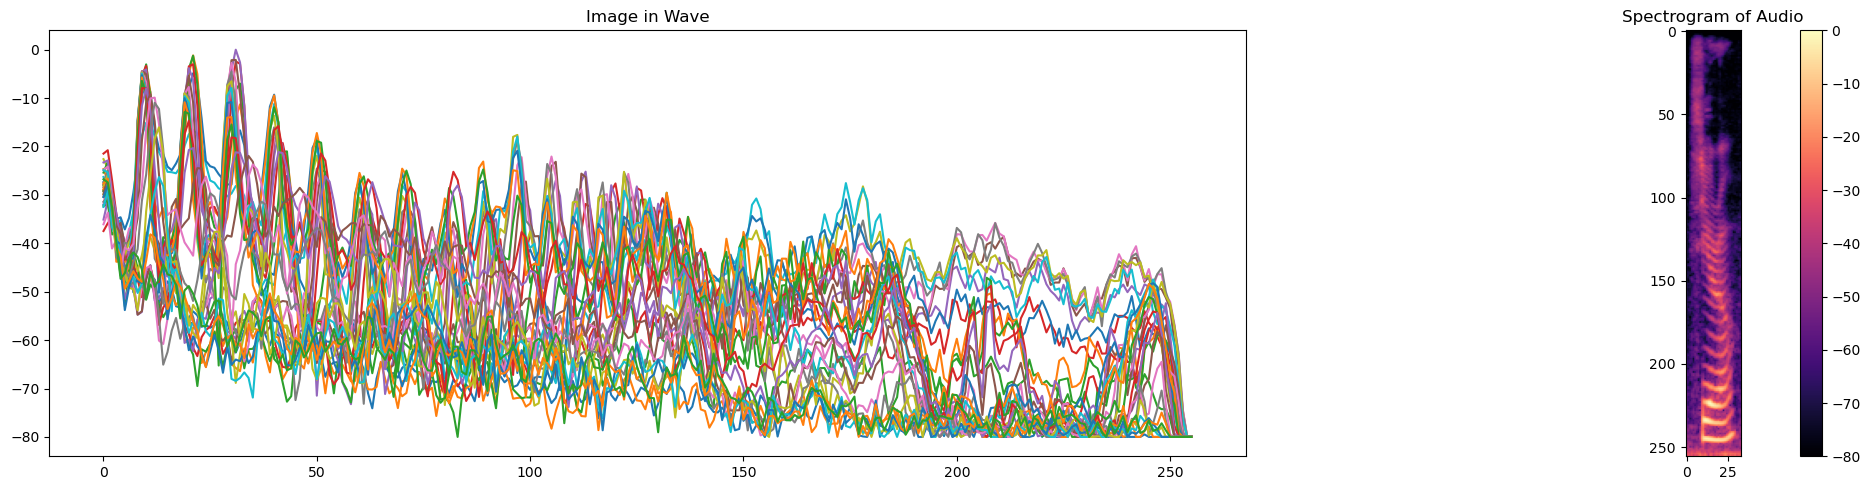

In [4]:
# Plot wave et spectrogramme
wavespecshow('0_01_0.tiff')

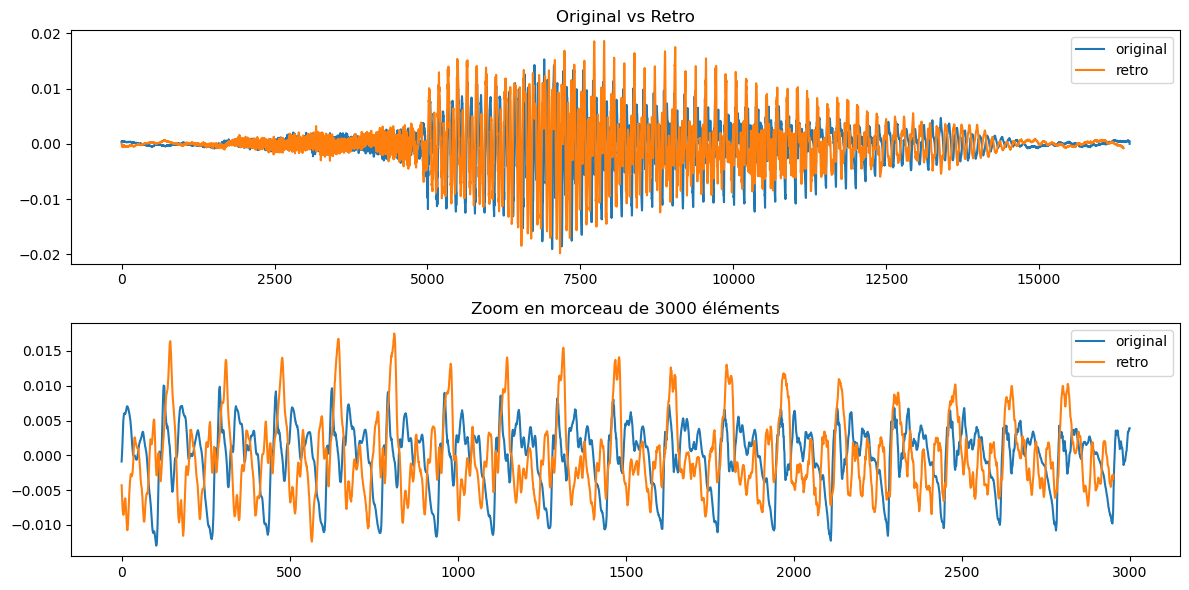

In [5]:
# Comparer avant/après
comparewaveshow('0_01_0.wav','retro0_01_0.wav',path = 'data/01/')

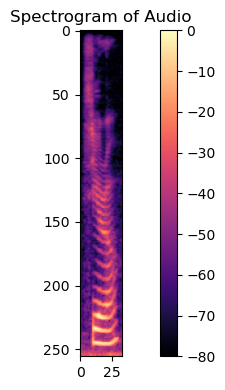

In [6]:
# Plot specshow seulement
specshow('0_01_0.tiff','Spectrogram of Audio')

# 3. Convertir de spectrogramme à audio et écouter

In [7]:
spectrogram2audio('0_01_0.tiff')

In [8]:
Audio('data/01/0_01_0.wav')

In [9]:
Audio('retro0_01_0.wav')

# 4. Test un example dans dataset de spectrogramme

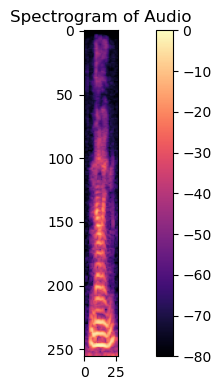

In [10]:
# Plot specshow seulement
specshow('data_img/9_08_0.tiff','Spectrogram of Audio')

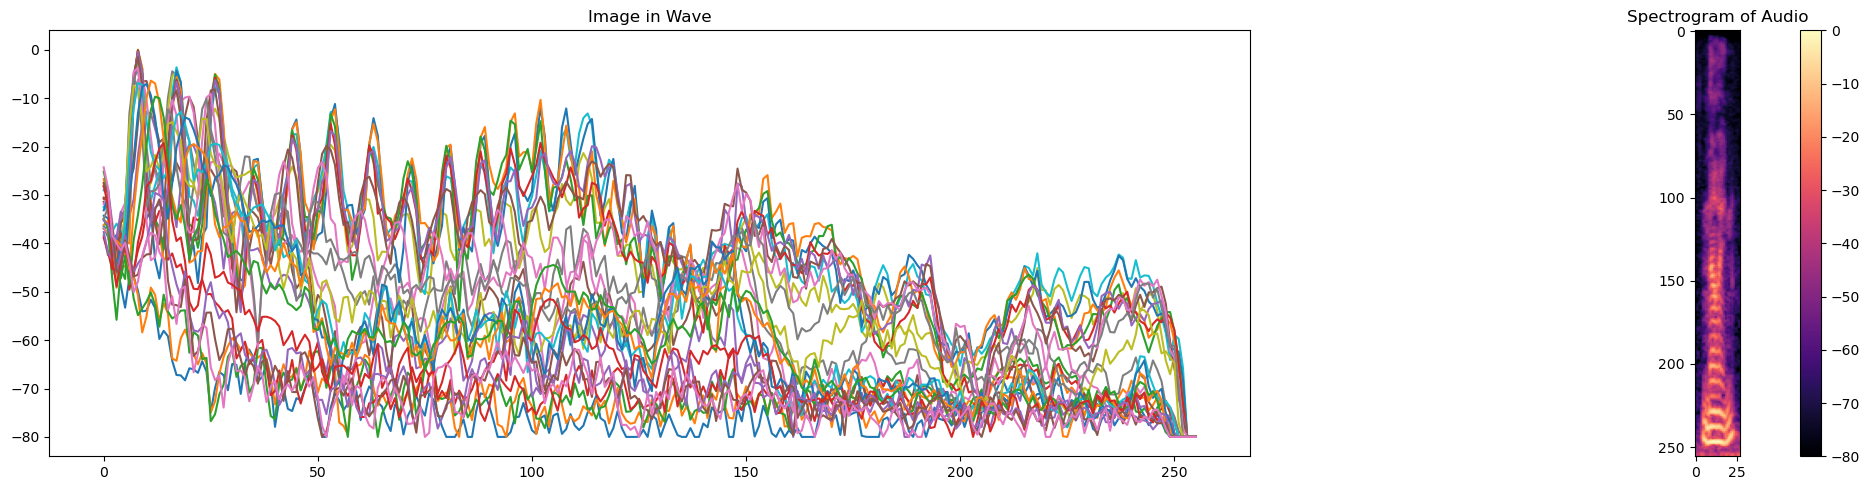

In [11]:
# Plot wave et spectrogramme
wavespecshow('data_img/9_08_0.tiff')

In [12]:
spectrogram2audio('9_08_0.tiff', path = 'data_img/')

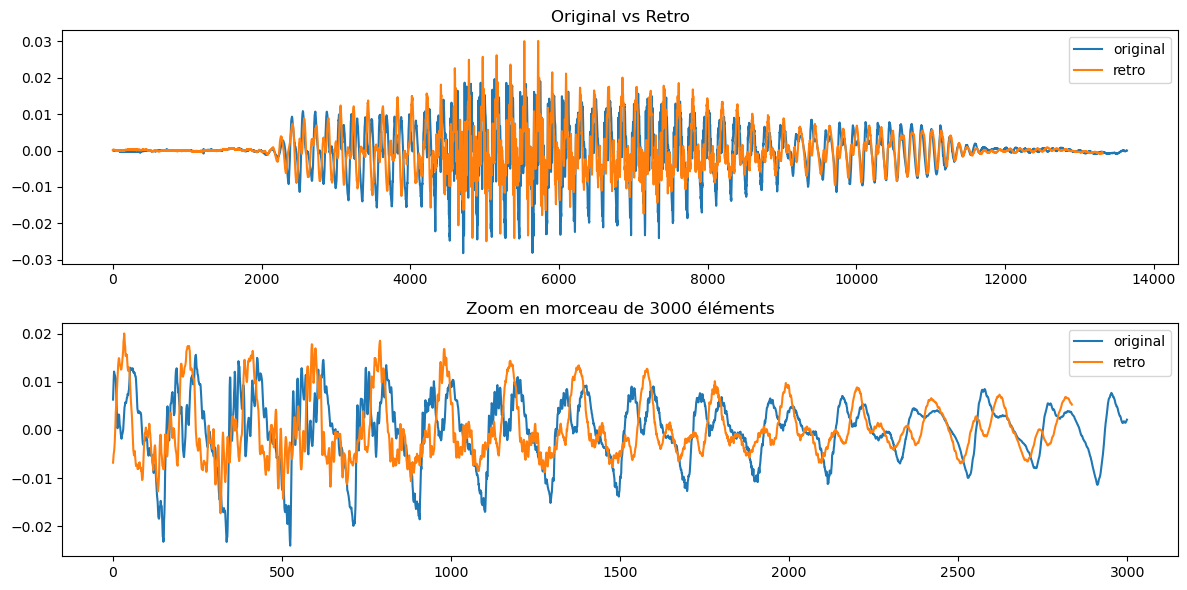

In [13]:
# Comparer avant/après
comparewaveshow('9_08_0.wav','retro9_08_0.wav',path = 'data/08/')

In [14]:
Audio('data/08/9_08_0.wav')

In [15]:
Audio('retro9_08_0.wav')